# 라이브러리 로드

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
%cd /project/ahnailab/jsj0414/losses_research

/project/ahnailab/jsj0414/losses_research


/home/jsj0414/.conda/envs/image/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# DATA_LOAD

In [2]:
new_loss = [ "IoUWithGaussianLoss",
        "BCEWithGaussianLoss",
        "DiceWithGaussianLoss",
        "FocalWithGaussianLoss",
        
        "FocalWithSSIMLoss",
        "IoUWithSSIMLoss" ,
        "DiceWithSSIMLoss"  ,
        "BCEWithSSIMLoss"  ,
        
        "FocalWithContextualLoss" ,
        "BCEWithContextualLoss" ,
        "IoUWithContextualLoss"  ,
        "DiceWithContextualLoss"  ,
        
        "IoUWithTVLoss_tar" ,
        "FocalWithTVLoss_tar"  ,
        "DiceWithTVLoss_tar"  ,
        "BCEWithTVLoss_tar" ,
        
        
        "FocalWithEdgeLoss" ,
        "BCEWithEdgeLoss" ,
        "IoUWithEdgeLoss" ,
        "DiceWithEdgeLoss"]

pres_loss = ['IoULoss', 'DiceLoss', 'BCELoss', 'FocalLoss', 'IoUDiceLoss', 'IoUBCELoss', 'IoUFocalLoss', 
'DiceBCELoss', 'DiceFocalLoss', 'BCEFocalLoss']

all_loss = new_loss + pres_loss
print(f"present_loss_count : {len(pres_loss)}\n present_all_loss : {pres_loss}\n")
print(f"new_loss_count : {len(new_loss)}\n new_loss_loss : {new_loss}\n")
print(f"all_loss_count  : {all_loss} \n all_loss_count : {len(all_loss)} \n ")

all_data = pd.read_csv("./all_data_0511.csv")

present_loss_count : 10
 present_all_loss : ['IoULoss', 'DiceLoss', 'BCELoss', 'FocalLoss', 'IoUDiceLoss', 'IoUBCELoss', 'IoUFocalLoss', 'DiceBCELoss', 'DiceFocalLoss', 'BCEFocalLoss']

new_loss_count : 20
 new_loss_loss : ['IoUWithGaussianLoss', 'BCEWithGaussianLoss', 'DiceWithGaussianLoss', 'FocalWithGaussianLoss', 'FocalWithSSIMLoss', 'IoUWithSSIMLoss', 'DiceWithSSIMLoss', 'BCEWithSSIMLoss', 'FocalWithContextualLoss', 'BCEWithContextualLoss', 'IoUWithContextualLoss', 'DiceWithContextualLoss', 'IoUWithTVLoss_tar', 'FocalWithTVLoss_tar', 'DiceWithTVLoss_tar', 'BCEWithTVLoss_tar', 'FocalWithEdgeLoss', 'BCEWithEdgeLoss', 'IoUWithEdgeLoss', 'DiceWithEdgeLoss']

all_loss_count  : ['IoUWithGaussianLoss', 'BCEWithGaussianLoss', 'DiceWithGaussianLoss', 'FocalWithGaussianLoss', 'FocalWithSSIMLoss', 'IoUWithSSIMLoss', 'DiceWithSSIMLoss', 'BCEWithSSIMLoss', 'FocalWithContextualLoss', 'BCEWithContextualLoss', 'IoUWithContextualLoss', 'DiceWithContextualLoss', 'IoUWithTVLoss_tar', 'FocalWithTVLos

# wound - 개수 & 손실함수 누락 여부 확인

In [3]:
len(all_data[all_data["data_name"] == "wound"]) #/28

1870

In [4]:
begin = all_data[all_data["data_name"] == "wound"]

M = begin["model_name"].unique().tolist()
L = begin["loss_name"].unique().tolist()

nurack_loss = []
for m in M:
    m_b = begin[begin["model_name"] == m]

    groups = m_b.groupby(["loss_name"])["iter"].agg(["count"])

    # print(f"\n{m}",groups,"\n")
    # print(f"loss count: {len(groups)}")

    loss = m_b["loss_name"].unique()

    for l in L:
        if l not in loss:
            nurack_loss.append(l)
            
    # if len(nurack_loss) != 0:
    #     print(f"\n{m}",groups,"\n")
    #     print(f"loss count: {len(groups)}")
    #     print(f"\n누락된 loss :{nurack_loss}\n")

    print(f"\n{m}",groups,"\n")
    print(f"loss count: {len(groups)}")
    print(f"\n누락된 loss :{nurack_loss}\n")
    
    nurack_loss = []


FCBFormer                          count
loss_name                     
BCEFocalLoss                 5
BCELoss                      5
BCEWeightedLoss              5
BCEWithContextualLoss        5
BCEWithEdgeLoss              5
BCEWithGaussianLoss          5
BCEWithSSIMLoss              5
BCEWithTVLoss_tar            5
DiceBCELoss                  5
DiceFocalLoss                5
DiceLoss                     5
DiceWeightedLoss             5
DiceWithContextualLoss       5
DiceWithEdgeLoss             5
DiceWithGaussianLoss         5
DiceWithSSIMLoss             5
DiceWithTVLoss_tar           5
FocalLoss                    5
FocalWithContextualLoss      5
FocalWithEdgeLoss            5
FocalWithGaussianLoss        5
FocalWithSSIMLoss            5
FocalWithTVLoss_tar          5
IoUBCELoss                   5
IoUDiceLoss                  5
IoUFocalLoss                 5
IoULoss                      5
IoUWeightedLoss              5
IoUWithContextualLoss        5
IoUWithEdgeLoss             

# Kvasir - 개수 & 손실함수 누락 여부 확인

In [5]:
len(all_data[all_data["data_name"] == "Kvasir-SEG"])

1870

In [6]:
begin = all_data[all_data["data_name"] == "Kvasir-SEG"]

M = begin["model_name"].unique().tolist()
L = begin["loss_name"].unique().tolist()

nurack_loss = []
for m in M:
    m_b = begin[begin["model_name"] == m]

    groups = m_b.groupby(["loss_name"])["iter"].agg(["count"])

    print(f"\n{m}",groups,"\n")
    print(f"loss count: {len(groups)}")

    loss = m_b["loss_name"].unique()

    for l in L:
        if l not in loss:
            nurack_loss.append(l)
    print(f"\n{nurack_loss}\n")
    
    nurack_loss = []


ColonFormer                          count
loss_name                     
BCEFocalLoss                 5
BCELoss                      5
BCEWeightedLoss              5
BCEWithContextualLoss        5
BCEWithEdgeLoss              5
BCEWithGaussianLoss          5
BCEWithSSIMLoss              5
BCEWithTVLoss_tar            5
DiceBCELoss                  5
DiceFocalLoss                5
DiceLoss                     5
DiceWeightedLoss             5
DiceWithContextualLoss       5
DiceWithEdgeLoss             5
DiceWithGaussianLoss         5
DiceWithSSIMLoss             5
DiceWithTVLoss_tar           5
FocalLoss                    5
FocalWithContextualLoss      5
FocalWithEdgeLoss            5
FocalWithGaussianLoss        5
FocalWithSSIMLoss            5
FocalWithTVLoss_tar          5
IoUBCELoss                   5
IoUDiceLoss                  5
IoUFocalLoss                 5
IoULoss                      5
IoUWeightedLoss              5
IoUWithContextualLoss        5
IoUWithEdgeLoss           

In [7]:
begin = all_data[all_data["data_name"] == "Kvasir-SEG"]

M = begin["model_name"].unique().tolist()
L = begin["loss_name"].unique().tolist()

nurack_loss = []
for m in M:
    m_b = begin[begin["model_name"] == m]

    groups = m_b.groupby(["loss_name"])["iter"].agg(["count"])

    # print(f"\n{m}",groups,"\n")
    # print(f"loss count: {len(groups)}")

    loss = m_b["loss_name"].unique()

    for l in L:
        if l not in loss:
            nurack_loss.append(l)
            
    if len(nurack_loss) != 0:
        print(f"\n{m}",groups,"\n")
        print(f"loss count: {len(groups)}")
        print(f"\n누락된 loss :{nurack_loss}\n")
    
    nurack_loss = []

# begin - 개수 & 손실함수 누락 여부 확인

In [8]:
begin_len = len(all_data[all_data["data_name"] == "breast-cancer-benign"])
print(f"총 개수 : {begin_len}")

총 개수 : 1870


In [9]:
begin = all_data[all_data["data_name"] == "breast-cancer-benign"]

M = begin["model_name"].unique().tolist()
L = begin["loss_name"].unique().tolist()

nurack_loss = []
for m in M:
    m_b = begin[begin["model_name"] == m]

    groups = m_b.groupby(["loss_name"])["iter"].agg(["count"])

    # print(f"\n{m}",groups,"\n")
    # print(f"loss count: {len(groups)}")

    loss = m_b["loss_name"].unique()

    for l in L:
        if l not in loss:
            nurack_loss.append(l)
            
    # if len(nurack_loss) != 0:
    print(f"\n{m}",groups,"\n")
    print(f"loss count: {len(groups)}")
    print(f"\n누락된 loss :{nurack_loss}\n")
    
    nurack_loss = []


ColonFormer                          count
loss_name                     
BCEFocalLoss                 5
BCELoss                      5
BCEWeightedLoss              5
BCEWithContextualLoss        5
BCEWithEdgeLoss              5
BCEWithGaussianLoss          5
BCEWithSSIMLoss              5
BCEWithTVLoss_tar            5
DiceBCELoss                  5
DiceFocalLoss                5
DiceLoss                     5
DiceWeightedLoss             5
DiceWithContextualLoss       5
DiceWithEdgeLoss             5
DiceWithGaussianLoss         5
DiceWithSSIMLoss             5
DiceWithTVLoss_tar           5
FocalLoss                    5
FocalWithContextualLoss      5
FocalWithEdgeLoss            5
FocalWithGaussianLoss        5
FocalWithSSIMLoss            5
FocalWithTVLoss_tar          5
IoUBCELoss                   5
IoUDiceLoss                  5
IoUFocalLoss                 5
IoULoss                      5
IoUWeightedLoss              5
IoUWithContextualLoss        5
IoUWithEdgeLoss           

# CVC - 개수 & 손실함수 누락 여부 확인

In [10]:
cvc_len = len(all_data[all_data["data_name"] == "CVC-ClinicDB"])
cvc_len

1870

In [11]:
begin = all_data[all_data["data_name"] == "CVC-ClinicDB"]
M = begin["model_name"].unique().tolist()
L = begin["loss_name"].unique().tolist()

nurack_loss = []
for m in M:
    m_b = begin[begin["model_name"] == m]

    groups = m_b.groupby(["loss_name"])["iter"].agg(["count"])

    loss = m_b["loss_name"].unique()

    for l in L:
        if l not in loss:
            nurack_loss.append(l)
            
    print(f"\n{m}",groups,"\n")
    print(f"loss count: {len(groups)}")
    print(f"\n누락된 loss :{nurack_loss}\n")
        
    # if len(nurack_loss) != 0:
    #     print(f"\n{m}",groups,"\n")
    #     print(f"loss count: {len(groups)}")
    #     print(f"\n누락된 loss :{nurack_loss}\n")
    
    nurack_loss = []


ColonFormer                          count
loss_name                     
BCEFocalLoss                 5
BCELoss                      5
BCEWeightedLoss              5
BCEWithContextualLoss        5
BCEWithEdgeLoss              5
BCEWithGaussianLoss          5
BCEWithSSIMLoss              5
BCEWithTVLoss_tar            5
DiceBCELoss                  5
DiceFocalLoss                5
DiceLoss                     5
DiceWeightedLoss             5
DiceWithContextualLoss       5
DiceWithEdgeLoss             5
DiceWithGaussianLoss         5
DiceWithSSIMLoss             5
DiceWithTVLoss_tar           5
FocalLoss                    5
FocalWithContextualLoss      5
FocalWithEdgeLoss            5
FocalWithGaussianLoss        5
FocalWithSSIMLoss            5
FocalWithTVLoss_tar          5
IoUBCELoss                   5
IoUDiceLoss                  5
IoUFocalLoss                 5
IoULoss                      5
IoUWeightedLoss              5
IoUWithContextualLoss        5
IoUWithEdgeLoss           

# malignant - 개수 & 손실함수 누락 여부 확인

In [12]:
malignant_len = len(all_data[all_data["data_name"] == "breast-cancer-malignant"])
malignant_len

1870

In [13]:
malignant = all_data[all_data["data_name"] == "breast-cancer-malignant"]

M = malignant["model_name"].unique().tolist()
L = malignant["loss_name"].unique().tolist()

nurack_loss = []
for m in M:
    m_b = malignant[malignant["model_name"] == m]

    groups = m_b.groupby(["loss_name"])["iter"].agg(["count"])

    loss = m_b["loss_name"].unique()

    for l in L:
        if l not in loss:
            nurack_loss.append(l)

    # if len(nurack_loss) != 0:
    print(f"\n{m}",groups,"\n")
    print(f"loss count: {len(groups)}")
    print(f"\n누락된 loss :{nurack_loss}\n")
    
    nurack_loss = []


ESFPNet                          count
loss_name                     
BCEFocalLoss                 5
BCELoss                      5
BCEWeightedLoss              5
BCEWithContextualLoss        5
BCEWithEdgeLoss              5
BCEWithGaussianLoss          5
BCEWithSSIMLoss              5
BCEWithTVLoss_tar            5
DiceBCELoss                  5
DiceFocalLoss                5
DiceLoss                     5
DiceWeightedLoss             5
DiceWithContextualLoss       5
DiceWithEdgeLoss             5
DiceWithGaussianLoss         5
DiceWithSSIMLoss             5
DiceWithTVLoss_tar           5
FocalLoss                    5
FocalWithContextualLoss      5
FocalWithEdgeLoss            5
FocalWithGaussianLoss        5
FocalWithSSIMLoss            5
FocalWithTVLoss_tar          5
IoUBCELoss                   5
IoUDiceLoss                  5
IoUFocalLoss                 5
IoULoss                      5
IoUWeightedLoss              5
IoUWithContextualLoss        5
IoUWithEdgeLoss              5

# ISIC - 완료

In [14]:
ISIC_len = len(all_data[all_data["data_name"] == "ISIC"])
ISIC_len

1870

In [15]:
ISIC = all_data[all_data["data_name"] == "ISIC"]

M = ISIC["model_name"].unique().tolist()
L = ISIC["loss_name"].unique().tolist()

nurack_loss = []
for m in M:
    m_b = ISIC[ISIC["model_name"] == m]

    groups = m_b.groupby(["loss_name"])["iter"].agg(["count"])

    loss = m_b["loss_name"].unique()

    for l in L:
        if l not in loss:
            nurack_loss.append(l)

    
    print(f"\n{m}",groups,"\n")
    print(f"loss count: {len(groups)}")
    print(f"\n누락된 loss :{nurack_loss}\n")
    
    nurack_loss = []


DeepLab_V3+                          count
loss_name                     
BCEFocalLoss                 5
BCELoss                      5
BCEWeightedLoss              5
BCEWithContextualLoss        5
BCEWithEdgeLoss              5
BCEWithGaussianLoss          5
BCEWithSSIMLoss              5
BCEWithTVLoss_tar            5
DiceBCELoss                  5
DiceFocalLoss                5
DiceLoss                     5
DiceWeightedLoss             5
DiceWithContextualLoss       5
DiceWithEdgeLoss             5
DiceWithGaussianLoss         5
DiceWithSSIMLoss             5
DiceWithTVLoss_tar           5
FocalLoss                    5
FocalWithContextualLoss      5
FocalWithEdgeLoss            5
FocalWithGaussianLoss        5
FocalWithSSIMLoss            5
FocalWithTVLoss_tar          5
IoUBCELoss                   5
IoUDiceLoss                  5
IoUFocalLoss                 5
IoULoss                      5
IoUWeightedLoss              5
IoUWithContextualLoss        5
IoUWithEdgeLoss           

# 모델 - loss

In [16]:
all_data

,Unnamed: 0,data_name,model_name,loss_name,iter,best_epoch,test_iou,test_dice,test_precision,test_recall,test_f1
0,0,CVC-ClinicDB,ColonFormer,IoUWithGaussianLoss,0.0,86.0,0.781115,0.852272,0.914298,0.844978,0.852272
1,1,CVC-ClinicDB,ColonFormer,IoUWithGaussianLoss,1.0,37.0,0.777239,0.853466,0.911914,0.845156,0.853466
2,2,CVC-ClinicDB,ColonFormer,IoUWithGaussianLoss,2.0,23.0,0.784711,0.863578,0.875234,0.876920,0.863578
3,3,CVC-ClinicDB,ColonFormer,IoUWithGaussianLoss,3.0,107.0,0.786069,0.857776,0.925063,0.841628,0.857776
4,4,CVC-ClinicDB,ColonFormer,IoUWithGaussianLoss,4.0,103.0,0.823642,0.894470,0.923693,0.887948,0.894470
...,...,...,...,...,...,...,...,...,...,...,...
11216,11216,breast-cancer-malignant,FAT_Net,BCEWithEdgeLoss,0.0,33.0,0.585183,0.704467,0.731296,0.742956,0.704467
11217,11217,breast-cancer-malignant,FAT_Net,BCEWithEdgeLoss,1.0,51.0,0.599156,0.732014,0.781428,0.757210,0.732014
11218,11218,breast-cancer-malignant,FAT_Net,BCEWithEdgeLoss,2.0,11.0,0.515549,0.627586,0.657959,0.689864,0.627586
11219,11219,breast-cancer-malignant,FAT_Net,BCEWithEdgeLoss,3.0,56.0,0.602565,0.708067,0.737920,0.753720,0.708067


In [17]:
all_data[~all_data["loss_name"].str.contains("Weighted", na=False)]

,Unnamed: 0,data_name,model_name,loss_name,iter,best_epoch,test_iou,test_dice,test_precision,test_recall,test_f1
0,0,CVC-ClinicDB,ColonFormer,IoUWithGaussianLoss,0.0,86.0,0.781115,0.852272,0.914298,0.844978,0.852272
1,1,CVC-ClinicDB,ColonFormer,IoUWithGaussianLoss,1.0,37.0,0.777239,0.853466,0.911914,0.845156,0.853466
2,2,CVC-ClinicDB,ColonFormer,IoUWithGaussianLoss,2.0,23.0,0.784711,0.863578,0.875234,0.876920,0.863578
3,3,CVC-ClinicDB,ColonFormer,IoUWithGaussianLoss,3.0,107.0,0.786069,0.857776,0.925063,0.841628,0.857776
4,4,CVC-ClinicDB,ColonFormer,IoUWithGaussianLoss,4.0,103.0,0.823642,0.894470,0.923693,0.887948,0.894470
...,...,...,...,...,...,...,...,...,...,...,...
11216,11216,breast-cancer-malignant,FAT_Net,BCEWithEdgeLoss,0.0,33.0,0.585183,0.704467,0.731296,0.742956,0.704467
11217,11217,breast-cancer-malignant,FAT_Net,BCEWithEdgeLoss,1.0,51.0,0.599156,0.732014,0.781428,0.757210,0.732014
11218,11218,breast-cancer-malignant,FAT_Net,BCEWithEdgeLoss,2.0,11.0,0.515549,0.627586,0.657959,0.689864,0.627586
11219,11219,breast-cancer-malignant,FAT_Net,BCEWithEdgeLoss,3.0,56.0,0.602565,0.708067,0.737920,0.753720,0.708067


In [18]:
all_data["loss_name"].unique()

array(['IoUWithGaussianLoss', 'BCEWithGaussianLoss',
       'DiceWithGaussianLoss', 'FocalWithSSIMLoss',
       'FocalWithContextualLoss', 'BCEWithContextualLoss',
       'IoUWithTVLoss_tar', 'DiceWeightedLoss', 'BCEWeightedLoss',
       'IoUWeightedLoss', 'FocalWithEdgeLoss', 'BCEWithEdgeLoss', nan,
       'IoUWithTV_tar_Loss', 'IoUWithSSIMLoss', 'IoUWithEdgeLoss',
       'IoUWithContextualLoss', 'DiceWithTVLoss_tar',
       'DiceWithContextualLoss', 'DiceWithEdgeLoss', 'DiceWithSSIMLoss',
       'FocalWithTVLoss_tar', 'FocalWithGaussianLoss',
       'BCEWithTVLoss_tar', 'BCEWithSSIMLoss', 'IoULoss', 'DiceLoss',
       'BCELoss', 'FocalLoss', 'IoUDiceLoss', 'IoUBCELoss',
       'IoUFocalLoss', 'DiceBCELoss', 'DiceFocalLoss', 'BCEFocalLoss'],
      dtype=object)

In [19]:
df = all_data.copy()

df_no_weight = df[~df["loss_name"].str.contains("Weighted", na=False)]

# Pivot the table where 'data_name' is the index, 'loss_name' are columns, and values are the mean of other columns
pivot_table_1 = df_no_weight.pivot_table(index='data_name', columns='loss_name', values='test_dice', aggfunc='mean')

pivot_table_1

loss_name,BCEFocalLoss,BCELoss,BCEWithContextualLoss,BCEWithEdgeLoss,BCEWithGaussianLoss,BCEWithSSIMLoss,BCEWithTVLoss_tar,DiceBCELoss,DiceFocalLoss,DiceLoss,...,IoUBCELoss,IoUDiceLoss,IoUFocalLoss,IoULoss,IoUWithContextualLoss,IoUWithEdgeLoss,IoUWithGaussianLoss,IoUWithSSIMLoss,IoUWithTVLoss_tar,IoUWithTV_tar_Loss
data_name,,,,,,,,,,,,,,,,,,,,,
CVC-ClinicDB,0.828823,0.830083,0.854773,0.851609,0.851963,0.855865,0.853604,0.830845,0.825415,0.827602,...,0.831140,0.826694,0.826725,0.825268,0.862981,0.863964,0.846413,0.861686,0.800811,0.861266
ISIC,0.880693,0.880738,0.883414,0.883249,0.882829,0.883739,0.883037,0.880487,0.880142,0.880832,...,0.880859,0.881077,0.881133,0.880824,0.886202,0.885668,0.883198,0.885792,0.881157,0.885396
Kvasir-SEG,0.827627,0.827568,0.846930,0.841647,0.840061,0.841128,0.841303,0.827775,0.824275,0.822528,...,0.827611,0.824621,0.827097,0.826064,0.845658,0.843820,0.839407,0.843391,0.839260,0.844917
breast-cancer-benign,0.761281,0.761965,0.781039,0.777884,0.774697,0.791460,0.789785,0.760941,0.759493,0.761201,...,0.760576,0.759203,0.762105,0.757238,0.812172,0.792890,0.773076,0.801518,0.731339,0.800212
breast-cancer-malignant,0.674477,0.680637,0.693547,0.690865,0.685791,0.686443,0.689226,0.680281,0.674231,0.678349,...,0.675713,0.675610,0.680300,0.677964,0.821298,0.696330,0.690213,0.690111,0.694901,0.693875
wound,0.805501,0.805074,0.808494,0.805557,0.804234,0.806902,0.806088,0.808213,0.808701,0.811241,...,0.808848,0.808456,0.810037,0.811607,0.805901,0.806723,0.808717,0.806325,0.787887,0.807210


In [20]:
total_rank_df = pd.DataFrame(data = [0 for _ in range(len(pivot_table_1.columns))],
                             index=[loss for loss in list(pivot_table_1.columns)]).T

data_piv_1= pivot_table_1

all_loss_numb = len(pivot_table_1.columns) # 34
ranking = 10

for data in data_piv_1.index:
    for i in range(all_loss_numb):
        sort = data_piv_1.loc[data].sort_values(ascending=False)[:]
        ranks = ranking - i
        idx = sort.index[i]
        
        if ranks >=0:
            total_rank_df[idx]+=ranks
        else:
            total_rank_df[idx] = 0
        
        # total_rank_df[idx]+=ranks
        # if i+1 == 1:
        #     total_rank_df[idx]+=ranks
        # elif i+1 == 2:    
        #     total_rank_df[idx]+=ranks
        # elif i+1 == 3:
        #     total_rank_df[idx]+=ranks
        # elif i+1 == 4:    
        #     total_rank_df[idx]+=ranks
        # elif i+1 == 5:
        #     total_rank_df[idx]+=ranks
            
data_piv_1.loc['total'] = list(total_rank_df.loc[0].values)

pivot_table_sort_1 = data_piv_1.copy()
pivot_table_sort_1 = pivot_table_sort_1.T.sort_values(by = 'total',ascending=False).T
pivot_table_sort_1 = pivot_table_sort_1.fillna(0.0)
pivot_table_sort_1

loss_name,DiceWithContextualLoss,IoULoss,DiceLoss,IoUFocalLoss,DiceWithGaussianLoss,FocalWithContextualLoss,IoUBCELoss,BCEWithContextualLoss,IoUWithGaussianLoss,DiceFocalLoss,...,FocalWithEdgeLoss,FocalLoss,IoUDiceLoss,FocalWithTVLoss_tar,FocalWithSSIMLoss,IoUWithContextualLoss,IoUWithEdgeLoss,IoUWithSSIMLoss,IoUWithTVLoss_tar,IoUWithTV_tar_Loss
data_name,,,,,,,,,,,,,,,,,,,,,
CVC-ClinicDB,0.863190,0.825268,0.827602,0.826725,0.846917,0.838805,0.831140,0.854773,0.846413,0.825415,...,0.862649,0.793910,0.826694,0.841197,0.833529,0.862981,0.863964,0.861686,0.800811,0.861266
ISIC,0.885878,0.880824,0.880832,0.881133,0.883634,0.878600,0.880859,0.883414,0.883198,0.880142,...,0.885791,0.875663,0.881077,0.880540,0.881886,0.886202,0.885668,0.885792,0.881157,0.885396
Kvasir-SEG,0.848005,0.826064,0.822528,0.827097,0.841795,0.842791,0.827611,0.846930,0.839407,0.824275,...,0.844475,0.805110,0.824621,0.830589,0.833496,0.845658,0.843820,0.843391,0.839260,0.844917
breast-cancer-benign,0.809516,0.757238,0.761201,0.762105,0.773896,0.766932,0.760576,0.781039,0.773076,0.759493,...,0.789796,0.728849,0.759203,0.778363,0.765940,0.812172,0.792890,0.801518,0.731339,0.800212
breast-cancer-malignant,0.731319,0.677964,0.678349,0.680300,0.689850,0.686656,0.675713,0.693547,0.690213,0.674231,...,0.700500,0.654386,0.675610,0.681230,0.687741,0.821298,0.696330,0.690111,0.694901,0.693875
wound,0.809182,0.811607,0.811241,0.810037,0.809298,0.809180,0.808848,0.808494,0.808717,0.808701,...,0.805849,0.773026,0.808456,0.796961,0.802182,0.805901,0.806723,0.806325,0.787887,0.807210
total,48.000000,10.000000,9.000000,8.000000,7.000000,5.000000,4.000000,3.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


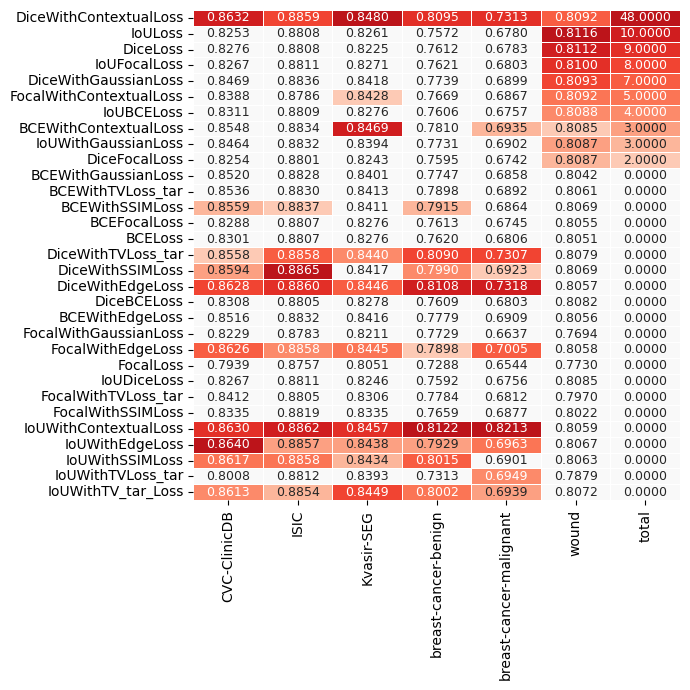

In [21]:
# pivot_table_sort_1.columns = pivot_table_sort_1.columns[1:]
testing = pivot_table_sort_1.T.sort_values(by = 'total',ascending=False).copy()
plt.rcdefaults()

nrank = 10 # You can change this value to display up to 'nrank' ranks

# Assume pivot_table is already defined
data = testing.values
data_ind = testing.columns           

# Calculate ranks per row
ranks = np.zeros_like(data, dtype=int)
sorted_indices = np.argsort(-data, axis=0)

for i in range(data.shape[1]):
    ranks[sorted_indices[:,i],i] = np.arange(1, data.shape[0] + 1)

# Transform rank data for color mapping
ranked_data = np.where(ranks <= nrank, ranks, nrank + 1)

# Use ColorBrewer's 'Reds' colormap
cmap = plt.get_cmap('Reds')

# Generate colors for 'nrank' ranks
color_positions = np.linspace(0.8, 0.2, nrank)
colors = [cmap(pos) for pos in color_positions]
colors.append('#F9F9F9')  # Color for 'Others'

# Create the new colormap
new_cmap = mcolors.ListedColormap(colors)

# Set normalization
bounds = np.arange(1, nrank + 3)
norm = mcolors.BoundaryNorm(bounds, new_cmap.N)

# Plot the heatmap
plt.figure(figsize=(7, 7))
ax = sns.heatmap(
    ranked_data,
    annot=data,
    fmt=".4f",
    cmap=new_cmap,
    norm=norm,
    cbar=False,
    xticklabels=testing.columns,
    yticklabels=testing.index,
    linewidths=0.5,
    annot_kws={"size" :9},
)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)  # x축 글자 크기
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10, rotation=0)  # y축 글자 크기


plt.tight_layout()       
out_path = f"./heat_map_barplot/result_data_heat.svg"
plt.savefig(out_path, format="svg", bbox_inches="tight")

plt.show()

# 

In [22]:
total_rank_df = pd.DataFrame(data = [0 for _ in range(len(pivot_table_1.columns))],
                             index=[loss for loss in list(pivot_table_1.columns)]).T

data_piv_1= pivot_table_1

all_loss_numb = len(pivot_table_1.columns) # 34
ranking = 10

In [25]:
# Pivot the table where 'data_name' is the index, 'loss_name' are columns, and values are the mean of other columns
pivot_table_2 = df_no_weight.pivot_table(index='model_name', columns='loss_name', values='test_dice', aggfunc='mean')
pivot_table_2 = pivot_table_2.fillna(0.0)
pivot_table_2

total_rank_df = pd.DataFrame(data = [0 for _ in range(len(pivot_table_1.columns))],
                             index=[loss for loss in list(pivot_table_1.columns)]).T
data_piv_2= pivot_table_2
all_loss_numb = len(pivot_table_1.columns) # 34

ranking = 10
for model in data_piv_2.index:
    for i in range(all_loss_numb):
        sort = data_piv_2.loc[model].sort_values(ascending=False)[:]
        idx = sort.index[i]

        ranks = ranking - i
        if ranks>=0:
            total_rank_df[idx]+=ranks
        
        else:
            ranks = 0
            total_rank_df[idx]+=ranks
            
data_piv_2.loc['total'] = list(total_rank_df.loc[0].values)

pivot_table_sort_2 = data_piv_2.copy()
pivot_table_sort_2 = pivot_table_sort_2.T.sort_values(by = 'total',ascending=False).T
pivot_table_sort_2 = pivot_table_sort_2.fillna(0.0)
pivot_table_sort_2

loss_name,IoUWithContextualLoss,DiceWithContextualLoss,DiceWithEdgeLoss,DiceWithTVLoss_tar,IoUWithTV_tar_Loss,IoUWithEdgeLoss,FocalWithEdgeLoss,DiceWithSSIMLoss,IoUWithSSIMLoss,BCEWithContextualLoss,...,BCELoss,BCEFocalLoss,DiceFocalLoss,DiceLoss,FocalLoss,FocalWithGaussianLoss,IoUBCELoss,FocalWithSSIMLoss,IoUWithGaussianLoss,IoUWithTVLoss_tar
model_name,,,,,,,,,,,,,,,,,,,,,
ColonFormer,0.825858,0.831087,0.827946,0.826895,0.827041,0.828704,0.827795,0.824471,0.826393,0.832327,...,0.708722,0.705915,0.710326,0.710135,0.662717,0.812782,0.711303,0.763028,0.821847,0.817859
ColonSegNet,0.794798,0.793247,0.798736,0.783695,0.723277,0.737596,0.732686,0.719458,0.728403,0.736500,...,0.722303,0.720332,0.705832,0.706039,0.712115,0.709274,0.713945,0.721945,0.711607,0.708378
DeepLab_V3+,0.864969,0.833413,0.838650,0.836747,0.823863,0.822793,0.827791,0.820859,0.820434,0.819985,...,0.821056,0.817642,0.816481,0.819590,0.781504,0.806622,0.818514,0.816420,0.816146,0.819201
EMCADNet,0.871807,0.844193,0.845019,0.847754,0.846153,0.847062,0.846251,0.844320,0.843306,0.840908,...,0.839250,0.838595,0.841947,0.843209,0.819160,0.816374,0.840585,0.839709,0.843207,0.844057
ESFPNet,0.856010,0.831011,0.826580,0.825999,0.828715,0.826147,0.826555,0.826677,0.827977,0.822089,...,0.823791,0.824719,0.821863,0.823904,0.798588,0.793861,0.824874,0.819235,0.824778,0.822674
FAT_Net,0.862815,0.823681,0.820529,0.823445,0.821047,0.821637,0.822410,0.823047,0.816747,0.819023,...,0.816836,0.816240,0.810930,0.814266,0.807168,0.806592,0.816411,0.813376,0.809193,0.627363
FCBFormer,0.911535,0.872569,0.873298,0.874179,0.874301,0.849364,0.850081,0.872972,0.873862,0.846060,...,0.842525,0.842825,0.846514,0.848225,0.815116,0.832826,0.843197,0.846412,0.846387,0.844523
FCN,0.832253,0.834528,0.827959,0.829262,0.829318,0.833305,0.832833,0.829763,0.830259,0.829198,...,0.822682,0.822168,0.822211,0.823793,0.792453,0.794931,0.824272,0.818706,0.823718,0.827206
UNet++,0.778995,0.785968,0.780731,0.780765,0.777327,0.778004,0.783648,0.779680,0.778434,0.776626,...,0.776533,0.769441,0.772955,0.775449,0.763289,0.760109,0.774999,0.772486,0.775977,0.774813


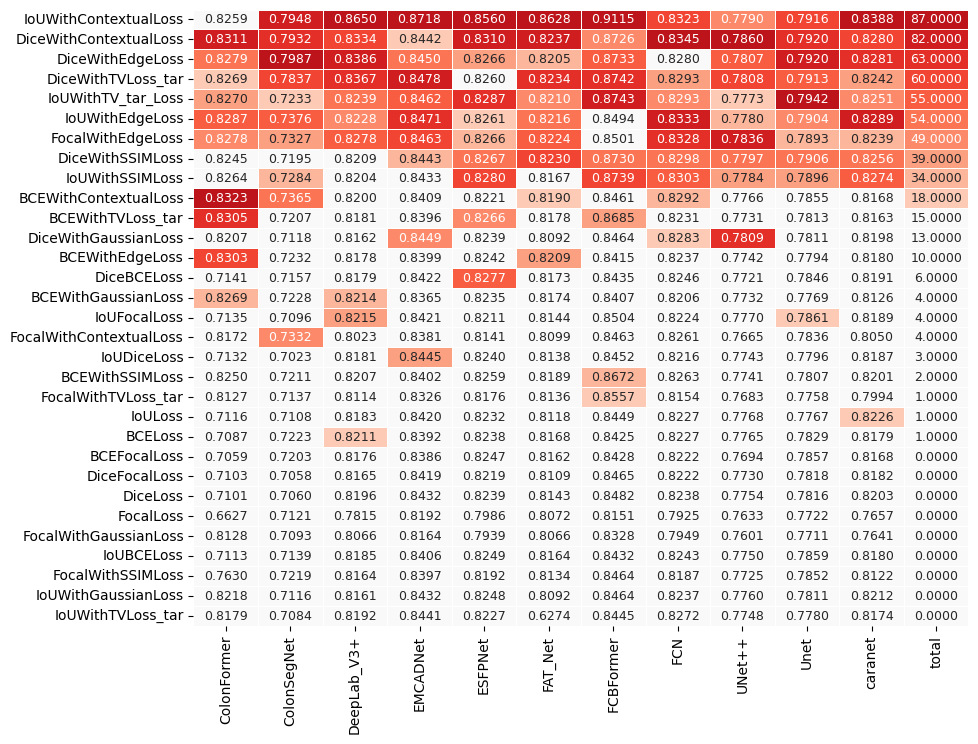

In [26]:
testing = pivot_table_sort_2.T.sort_values(by = 'total',ascending=False).copy()
plt.rcdefaults()

nrank = 10 # You can change this value to display up to 'nrank' ranks

# Assume pivot_table is already defined
data = testing.values
data_ind = testing.columns           

# Calculate ranks per row
ranks = np.zeros_like(data, dtype=int)
sorted_indices = np.argsort(-data, axis=0)

for i in range(data.shape[1]):
    ranks[sorted_indices[:,i],i] = np.arange(1, data.shape[0] + 1)

# Transform rank data for color mapping
ranked_data = np.where(ranks <= nrank, ranks, nrank + 1)

# Use ColorBrewer's 'Reds' colormap
cmap = plt.get_cmap('Reds')

# Generate colors for 'nrank' ranks
color_positions = np.linspace(0.8, 0.2, nrank)
colors = [cmap(pos) for pos in color_positions]
colors.append('#F9F9F9')  # Color for 'Others'

# Create the new colormap
new_cmap = mcolors.ListedColormap(colors)

# Set normalization
bounds = np.arange(1, nrank + 3)
norm = mcolors.BoundaryNorm(bounds, new_cmap.N)

# Plot the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    ranked_data,
    annot=data,
    fmt=".4f",
    cmap=new_cmap,
    norm=norm,
    cbar=False,
    xticklabels=testing.columns,
    yticklabels=testing.index,
    linewidths=0.5,
    annot_kws={"size" :9},
)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)  # x축 글자 크기
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10, rotation=0)  # y축 글자 크기


plt.show()

# Barplot

## 결합(주변지역정보랑 구분X) VS. 단일

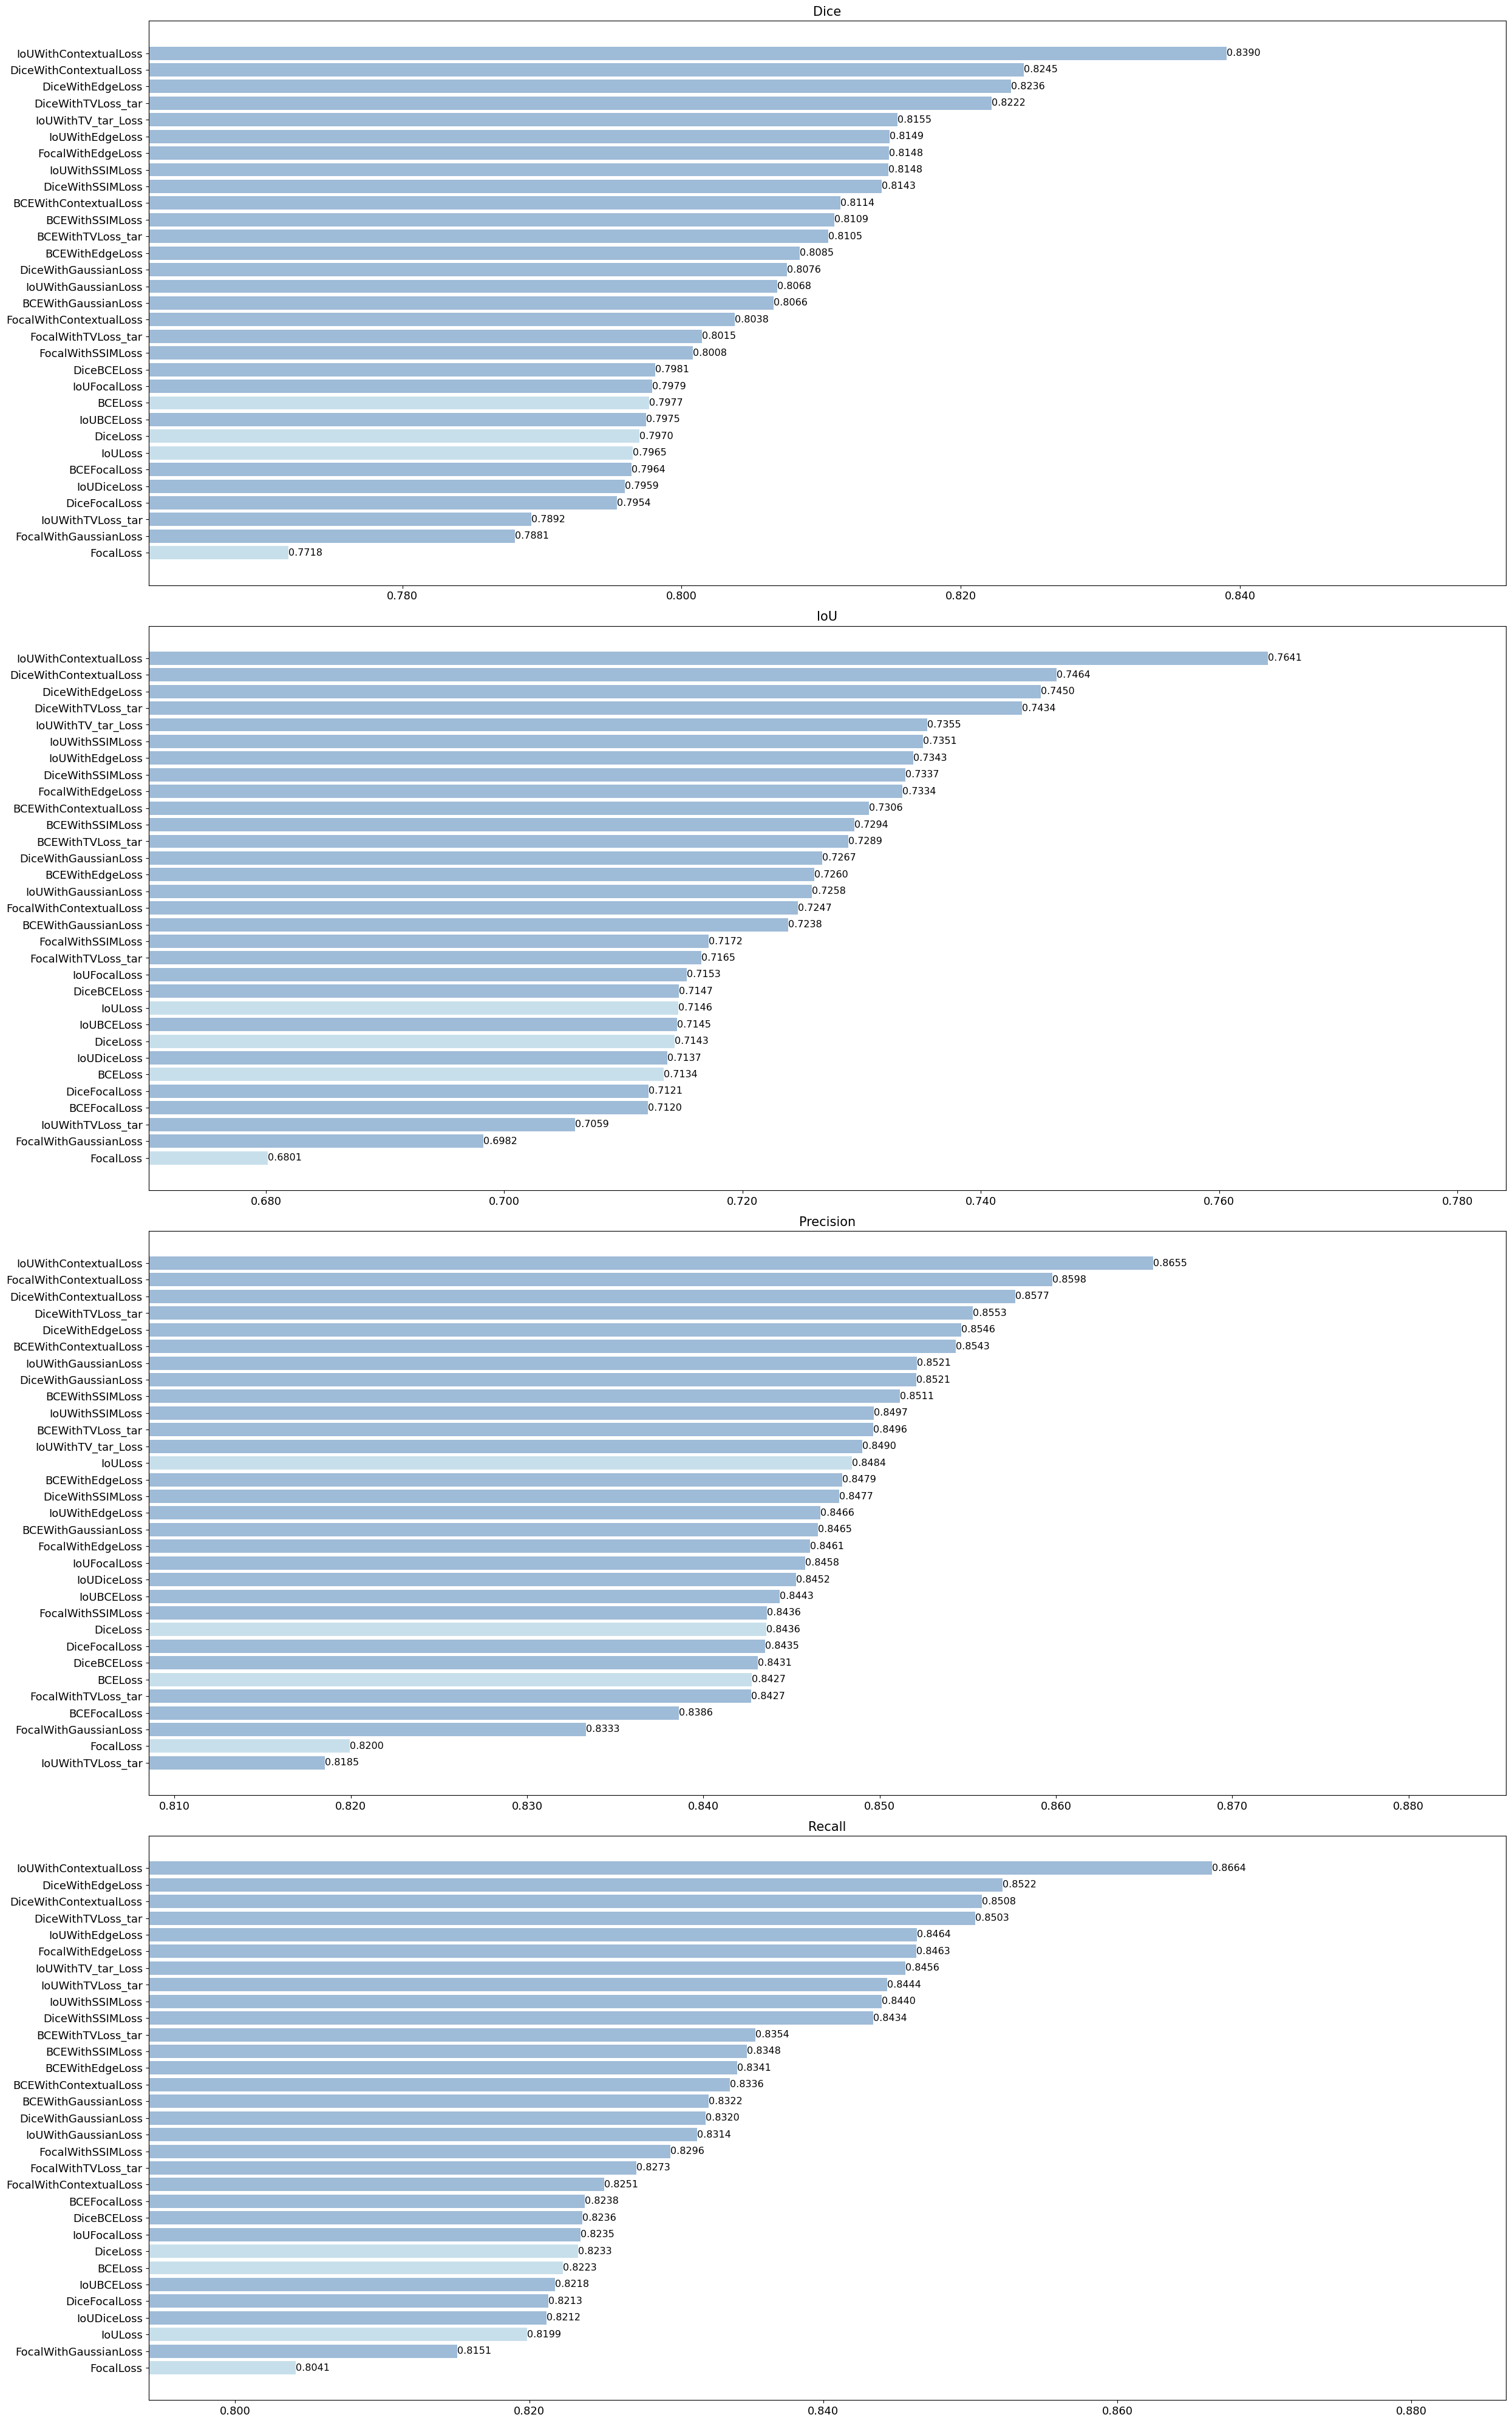

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['test_dice', 'test_iou', 'test_precision', 'test_recall']
metrics_len = len(metrics)

W = 61
H = 4

df_new = df_no_weight[df_no_weight['model_name'] != 'SegResNet']
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(25, 40))

for i1 in range(H):   
    # fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(25, 10))
    losses = df_new['loss_name'].unique()
    mean_values = []

    for loss in losses:   
        vals = df_new[df_new['loss_name'] == loss][metrics[i1]].dropna()
        mean_val = vals.mean()
        mean_values.append(mean_val)

    # 데이터프레임 생성
    data = pd.DataFrame(data=mean_values, index=list(losses), columns=['value_mean'])
    
    # NaN 제거 (혹시 평균이 NaN인 경우)
    data = data.dropna(subset=['value_mean'])

    colors_1 = sns.color_palette("ch:s=.25,rot=-.25")[0]
    colors_2 = sns.color_palette("ch:s=.25,rot=-.25")[1]

    data['color'] = [colors_1 if loss in ['BCELoss', 'DiceLoss', 'FocalLoss', 'IoULoss'] else colors_2 for loss in data.index]
    data = data.sort_values(by='value_mean', ascending=True)

    # 수평 바 차트 그리기
    axs[i1].barh(data.index, data['value_mean'], color=data['color'])

    # 성능 지표 이름 설정
    m = [metric.replace('test_', '') for metric in metrics]
    reset_met = [m[i][0].upper() + m[i][1:] if m[i] != 'iou' else 'IoU' for i in range(metrics_len)]
    axs[i1].set_title(f"{reset_met[i1]}", fontsize=15)

    # 바 위에 수치 표시
    for j, (value, y) in enumerate(zip(data['value_mean'], data.index)):
        min_loc = data['value_mean'].min()
        max_loc = data['value_mean'].max()
        vas = value - 0.0000001

        axs[i1].tick_params(axis='x', labelsize=13)
        axs[i1].tick_params(axis='y', labelsize=13)
        axs[i1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))
        axs[i1].text(vas, j, f'{value:.4f}', va='center', fontsize=11.5)
        axs[i1].set_xlim(min_loc - 0.01, max_loc + 0.02)

    plt.tight_layout()
    plt.savefig(f"./heat_map_barplot/bar_orignal_{reset_met[i1]}.svg", format="svg", bbox_inches="tight")
plt.savefig(f"./heat_map_barplot/ALL_bar_orignal.svg", format="svg", bbox_inches="tight")

## 결합(주변지역정보 O) VS. 결합(주변지역정보 X) VS. 단일

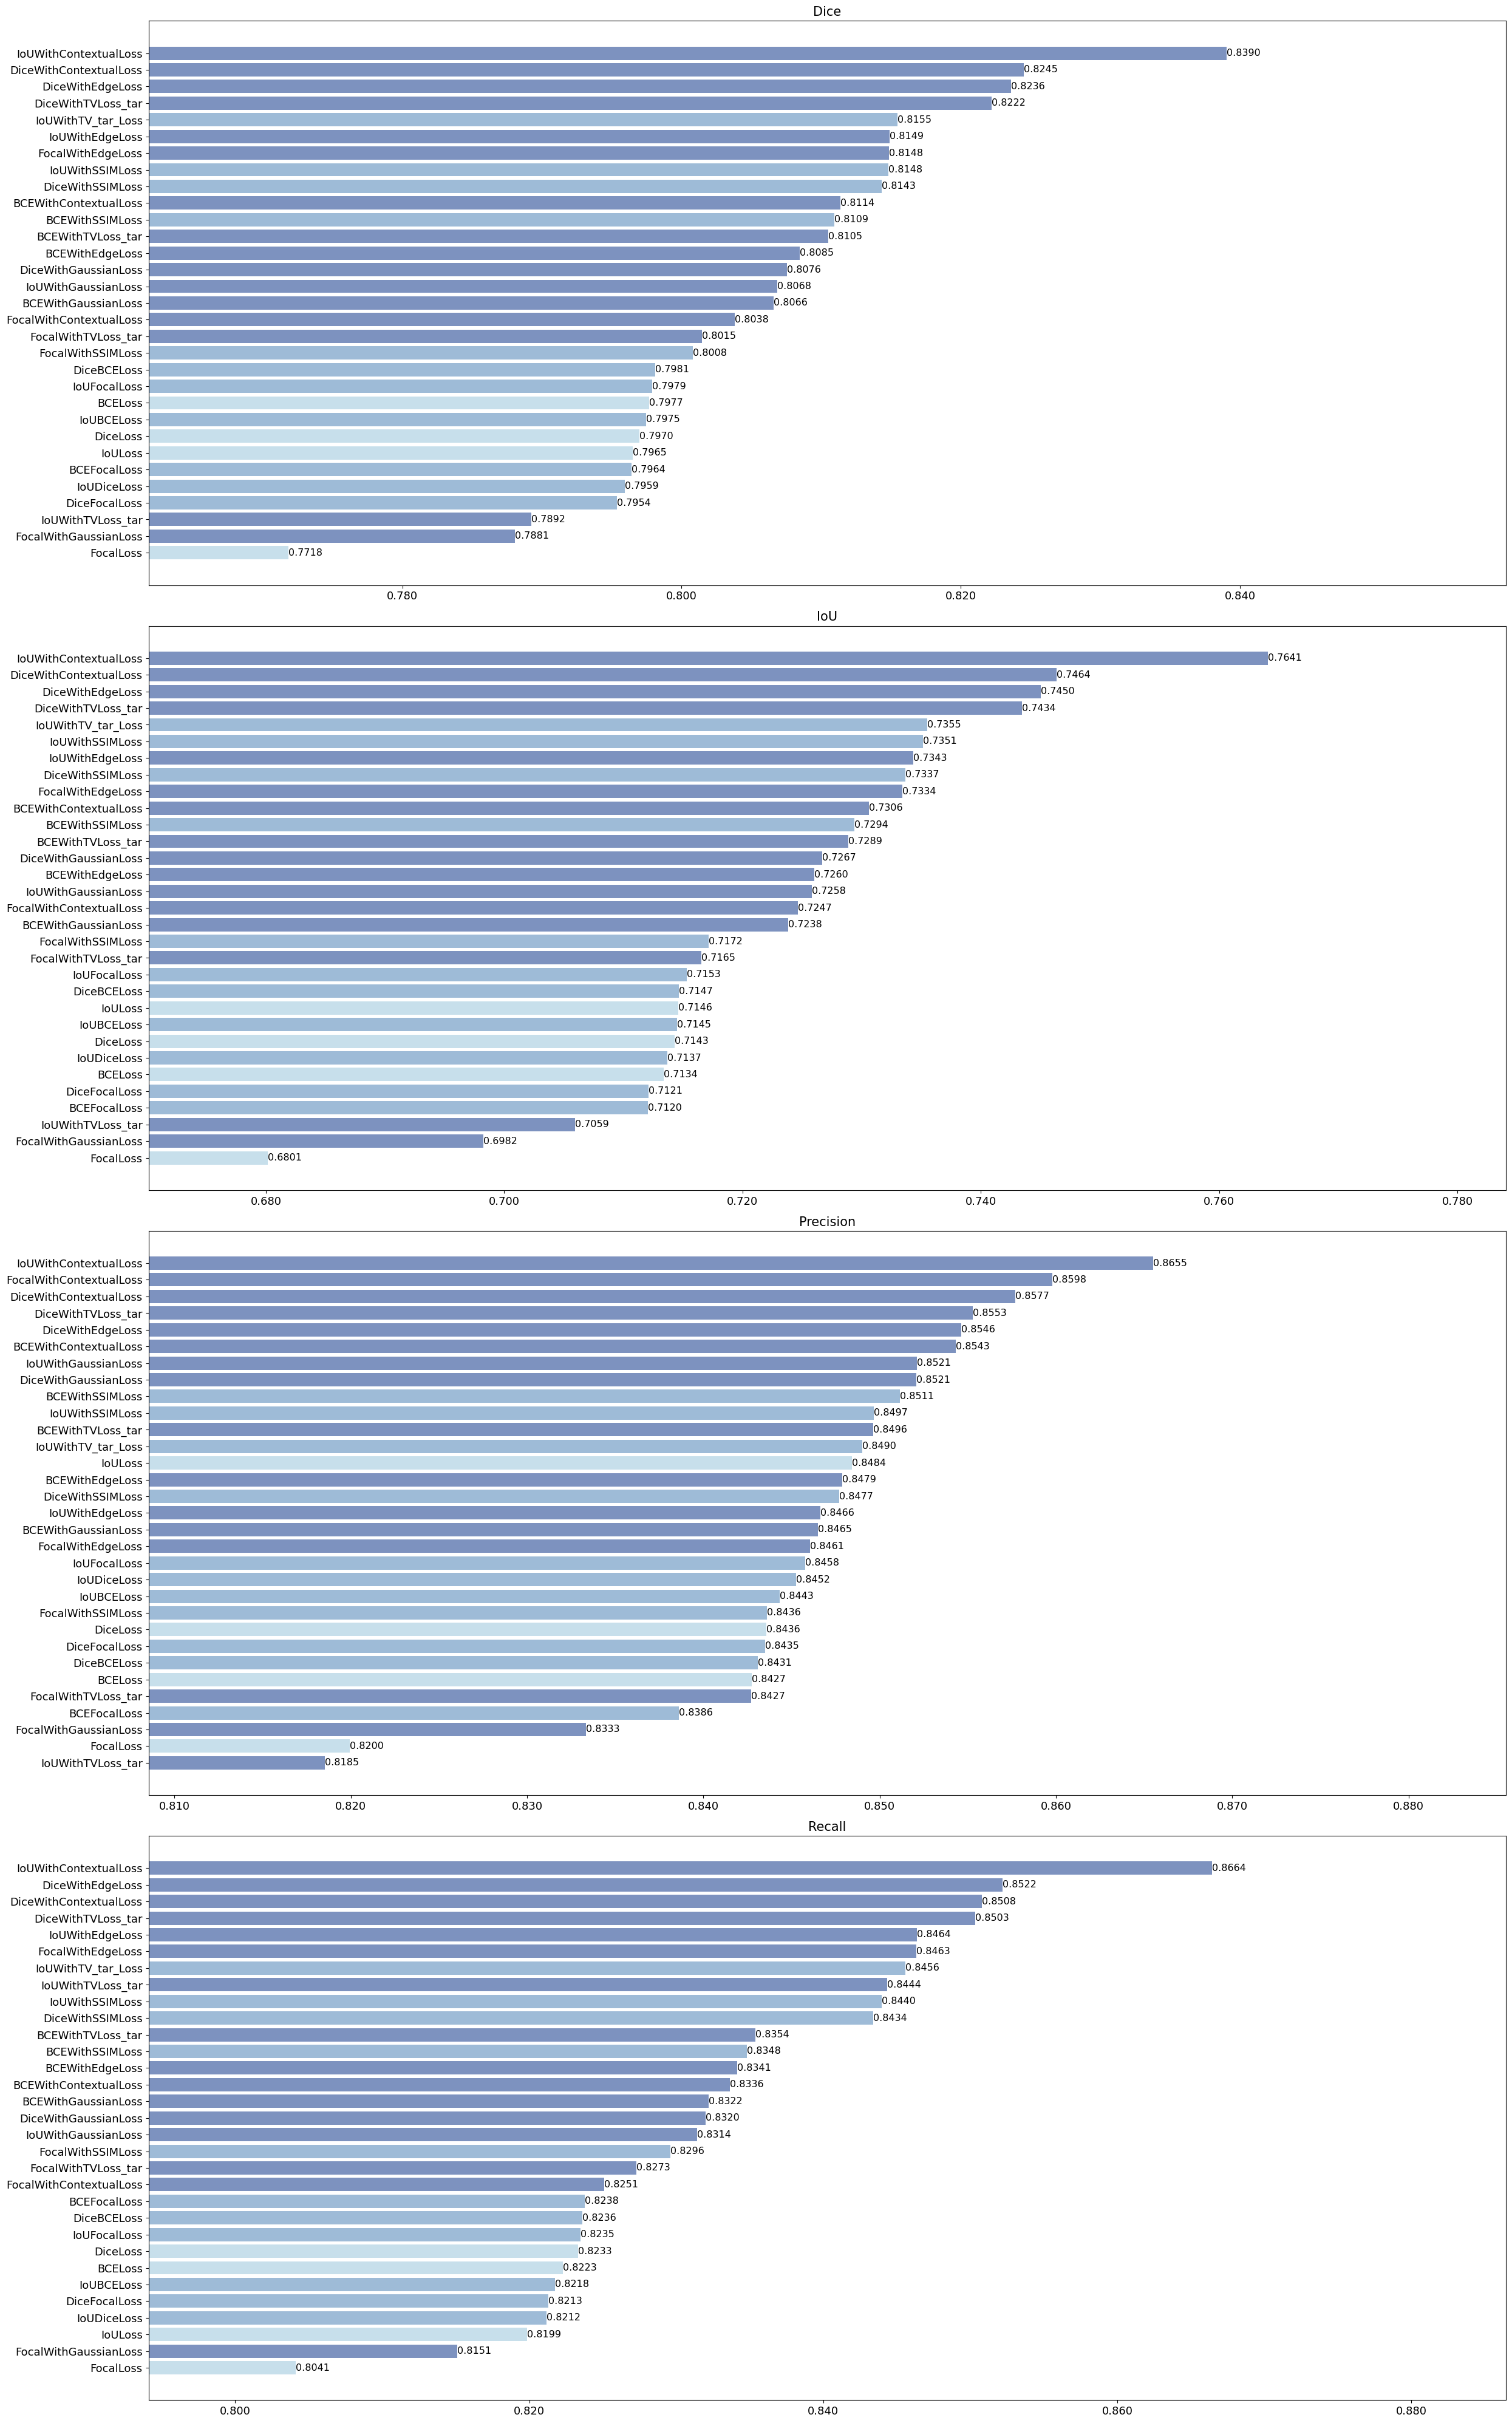

In [28]:
metrics = ['test_dice', 'test_iou', 'test_precision', 'test_recall']
metrics_len = len(metrics)

W = 61
H = 4

df_new = df_no_weight[df_no_weight['model_name'] != 'SegResNet']
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(25, 40))
for i1 in range(H):   
    # fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(25, 10))
    losses = df_new['loss_name'].unique()
    mean_values = []

    for loss in losses:   
        vals = df_new[df_new['loss_name'] == loss][metrics[i1]].dropna()
        mean_val = vals.mean()
        mean_values.append(mean_val)

    # 데이터프레임 생성
    data = pd.DataFrame(data=mean_values, index=list(losses), columns=['value_mean'])
    
    # NaN 제거 (혹시 평균이 NaN인 경우)
    data = data.dropna(subset=['value_mean'])

    colors_1 = sns.color_palette("ch:s=.25,rot=-.25")[0]
    colors_2 = sns.color_palette("ch:s=.25,rot=-.25")[1]
    colors_3 = sns.color_palette("ch:s=.25,rot=-.25")[2]

    colors = []
    for loss in data.index:
        if any(k in loss for k in ['GaussianLoss', 'TVLoss', 'EdgeLoss', 'ContextualLoss', 'WeightedLoss']):
            colors.append(colors_3)
            
        elif any(k == loss for k in ['BCELoss', 'DiceLoss', 'FocalLoss', 'IoULoss']):
            colors.append(colors_1)
        else:
            colors.append(colors_2)
    data['color'] = colors
    data = data.sort_values(by='value_mean', ascending=True)

    # 수평 바 차트 그리기
    axs[i1].barh(data.index, data['value_mean'], color=data['color'])

    # 성능 지표 이름 설정
    m = [metric.replace('test_', '') for metric in metrics]
    reset_met = [m[i][0].upper() + m[i][1:] if m[i] != 'iou' else 'IoU' for i in range(metrics_len)]
    axs[i1].set_title(f"{reset_met[i1]}", fontsize=15)

    # 바 위에 수치 표시
    for j, (value, y) in enumerate(zip(data['value_mean'], data.index)):
        min_loc = data['value_mean'].min()
        max_loc = data['value_mean'].max()
        vas = value - 0.0000001

        axs[i1].tick_params(axis='x', labelsize=13)
        axs[i1].tick_params(axis='y', labelsize=13)
        axs[i1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))
        axs[i1].text(vas, j, f'{value:.4f}', va='center', fontsize=11.5)
        axs[i1].set_xlim(min_loc - 0.01, max_loc + 0.02)

    plt.tight_layout()
    plt.savefig(f"./heat_map_barplot/bar_gubun_{reset_met[i1]}.svg", format="svg", bbox_inches="tight")
plt.savefig(f"./heat_map_barplot/ALL_bar_gubun.svg", format="svg", bbox_inches="tight")